In [152]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as sch
import seaborn as sns

## Load data for chosen pathway

In [153]:
# Set data file name and pathway name

file_name = 'invasion_genes.xlsx'
pathway_name = 'Invasion'


In [154]:
# Read in the excel file in excel_data folder
df = pd.read_excel(f'../pathway_data/{file_name}', sheet_name='Sheet1', skiprows=7, names=['Target', 'ac', 'ac2', 'ac3', 'MRC5', 'MRC52', 'MRC53', 'hOB', 'hOB2', 'hOB3'])

In [155]:
# make the Target column the index
df.set_index('Target', inplace=True)
df.head()

,ac,ac2,ac3,MRC5,MRC52,MRC53,hOB,hOB2,hOB3
Target,,,,,,,,,
AKT1,3.216660,3.604679,3.246980,4.449136,4.590257,4.385165,4.266576,4.299984,4.348928
AKT2,3.545431,3.251513,2.710901,3.961825,4.027125,4.066001,3.207130,3.855505,3.590218
AKT3,3.289174,3.506088,3.510080,3.314312,3.238529,3.174454,3.290138,3.394770,3.107115
RUNX3,3.681045,3.533420,3.885675,3.125866,3.023737,2.746872,2.456153,2.787535,3.273592
RORC,2.881045,3.768592,4.000976,2.804317,2.780389,2.720680,3.290138,2.568913,2.980329


## T-test for genes with significant change in expression compared to acellular 
Use Welch's t-test 

In [156]:
df_ttest = df.copy()

In [157]:
# make new columns for the average of each group
df_ttest['MRC5_avg'] = df_ttest[['MRC5', 'MRC52', 'MRC53']].mean(axis=1)
df_ttest['hOB_avg'] = df_ttest[['hOB', 'hOB2', 'hOB3']].mean(axis=1)
df_ttest['ac_avg'] = df_ttest[['ac', 'ac2', 'ac3']].mean(axis=1)

In [158]:
gene_list = df_ttest.index.values.tolist()

print('no. of genes in pathway: ', len(gene_list))

no. of genes in pathway:  23


In [159]:
df_MRC5 = df_ttest[['MRC5', 'MRC52', 'MRC53']].T
df_hOB = df_ttest[['hOB', 'hOB2', 'hOB3']].T
df_ac = df_ttest[['ac', 'ac2', 'ac3']].T

In [160]:
MRC5_changed_genes = []

for gene in gene_list:
    stat, pval = stats.ttest_ind(df_MRC5[gene], df_ac[gene], equal_var = False)
    if pval < 0.05:
        MRC5_changed_genes.append(gene)

In [161]:
hOB_changed_genes = []

for gene in gene_list:
    stat, pval = stats.ttest_ind(df_hOB[gene], df_ac[gene], equal_var = False)
    if pval < 0.05:
        hOB_changed_genes.append(gene)

In [162]:
print('% of genes that changed in MRC5: ', len(MRC5_changed_genes)/len(gene_list))
print('% of genes that changed in hOB: ', len(hOB_changed_genes)/len(gene_list))

% of genes that changed in MRC5:  0.5652173913043478
% of genes that changed in hOB:  0.34782608695652173


In [163]:
print('no. of genes that changed in MRC5: ', len(MRC5_changed_genes))
print('no. of genes that changed in hOB: ', len(hOB_changed_genes))

no. of genes that changed in MRC5:  13
no. of genes that changed in hOB:  8


In [164]:
print('no. of genes that changed in both: ', len(set(MRC5_changed_genes).intersection(hOB_changed_genes)))
print('names of genes that changed in both: ', set(MRC5_changed_genes).intersection(hOB_changed_genes))

no. of genes that changed in both:  6
names of genes that changed in both:  {'ROCK1', 'RHOA', 'UBC', 'RPS27A', 'AKT1', 'UBB'}


In [165]:
print('% of genes that changed in either MRC5 or hOB: ', 100*len(set(MRC5_changed_genes).union(hOB_changed_genes))/len(gene_list))

% of genes that changed in either MRC5 or hOB:  65.21739130434783


In [166]:
# find no. of genes that increased in MRC5
MRC5_up_genes = []

for gene in MRC5_changed_genes:
    if df_ttest.loc[gene, 'MRC5_avg'] > df_ttest.loc[gene, 'ac_avg']:
        MRC5_up_genes.append(gene)

print('no. of genes that increased in MRC5: ', len(MRC5_up_genes))

# find no of genes that decreased in MRC5
MRC5_down_genes = []

for gene in MRC5_changed_genes:
    if df_ttest.loc[gene, 'MRC5_avg'] < df_ttest.loc[gene, 'ac_avg']:
        MRC5_down_genes.append(gene)

print('no. of genes that decreased in MRC5: ', len(MRC5_down_genes))

print('percentage of changed genes that increased in MRC5: ', len(MRC5_up_genes)/len(MRC5_changed_genes))
print('percentage of changed genes that decreased in MRC5: ', len(MRC5_down_genes)/len(MRC5_changed_genes))

print('percentage of genes that increased in MRC5: ', len(MRC5_up_genes)/len(gene_list))
print('percentage of genes that decreased in MRC5: ', len(MRC5_down_genes)/len(gene_list))

print('names of genes that increased in MRC5: ', MRC5_up_genes)
print('names of genes that decreased in MRC5: ', MRC5_down_genes)

no. of genes that increased in MRC5:  5
no. of genes that decreased in MRC5:  8
percentage of changed genes that increased in MRC5:  0.38461538461538464
percentage of changed genes that decreased in MRC5:  0.6153846153846154
percentage of genes that increased in MRC5:  0.21739130434782608
percentage of genes that decreased in MRC5:  0.34782608695652173
names of genes that increased in MRC5:  ['AKT1', 'UBB', 'RHOA', 'UBC', 'RPS27A']
names of genes that decreased in MRC5:  ['RUNX3', 'ROCK1', 'MMP9', 'ELANE', 'CMA1', 'MMP3', 'MMP7', 'MMP1']


In [167]:
# find no. of genes that increased in hOB
hOB_up_genes = []

for gene in hOB_changed_genes:
    if df_ttest.loc[gene, 'hOB_avg'] > df_ttest.loc[gene, 'ac_avg']:
        hOB_up_genes.append(gene)

print('no. of genes that increased in hOB: ', len(hOB_up_genes))

# find no of genes that decreased in hOB
hOB_down_genes = []

for gene in hOB_changed_genes:
    if df_ttest.loc[gene, 'hOB_avg'] < df_ttest.loc[gene, 'ac_avg']:
        hOB_down_genes.append(gene)

print('no. of genes that decreased in hOB: ', len(hOB_down_genes))

print('percentage of changed genes that increased in hOB: ', len(hOB_up_genes)/len(hOB_changed_genes))
print('percentage of changed genes that decreased in hOB: ', len(hOB_down_genes)/len(hOB_changed_genes))

print('percentage of genes that increased in hOB: ', len(hOB_up_genes)/len(gene_list))
print('percentage of genes that decreased in hOB: ', len(hOB_down_genes)/len(gene_list))

print('names of genes that increased in hOB: ', hOB_up_genes)
print('names of genes that decreased in hOB: ', hOB_down_genes)

no. of genes that increased in hOB:  7
no. of genes that decreased in hOB:  1
percentage of changed genes that increased in hOB:  0.875
percentage of changed genes that decreased in hOB:  0.125
percentage of genes that increased in hOB:  0.30434782608695654
percentage of genes that decreased in hOB:  0.043478260869565216
names of genes that increased in hOB:  ['AKT1', 'ROCK1', 'UBB', 'RHOA', 'UBC', 'RPS27A', 'TGFBR2']
names of genes that decreased in hOB:  ['CTSG']


In [168]:
# find no. of genes that increased in both
both_up_genes = []

for gene in set(MRC5_changed_genes).intersection(hOB_changed_genes):
    if df_ttest.loc[gene, 'MRC5_avg'] > df_ttest.loc[gene, 'ac_avg'] and df_ttest.loc[gene, 'hOB_avg'] > df_ttest.loc[gene, 'ac_avg']:
        both_up_genes.append(gene)

print('no. of genes that increased in both: ', len(both_up_genes))

# find no of genes that decreased in both
both_down_genes = []

for gene in set(MRC5_changed_genes).intersection(hOB_changed_genes):
    if df_ttest.loc[gene, 'MRC5_avg'] < df_ttest.loc[gene, 'ac_avg'] and df_ttest.loc[gene, 'hOB_avg'] < df_ttest.loc[gene, 'ac_avg']:
        both_down_genes.append(gene)

print('no. of genes that decreased in both: ', len(both_down_genes))

print('names of genes that increased in both: ', both_up_genes)
print('names of genes that decreased in both: ', both_down_genes)

no. of genes that increased in both:  5
no. of genes that decreased in both:  0
names of genes that increased in both:  ['RHOA', 'UBC', 'RPS27A', 'AKT1', 'UBB']
names of genes that decreased in both:  []


In [169]:
print('no of genes that increased in MRC5 and decreased in hOB: ', len(set(MRC5_up_genes).intersection(hOB_down_genes)))
print('names of genes that increased in MRC5 and decreased in hOB: ', set(MRC5_up_genes).intersection(hOB_down_genes))

print('no of genes that decreased in MRC5 and increased in hOB: ', len(set(MRC5_down_genes).intersection(hOB_up_genes)))
print('names of genes that decreased in MRC5 and increased in hOB: ', set(MRC5_down_genes).intersection(hOB_up_genes))

no of genes that increased in MRC5 and decreased in hOB:  0
names of genes that increased in MRC5 and decreased in hOB:  set()
no of genes that decreased in MRC5 and increased in hOB:  1
names of genes that decreased in MRC5 and increased in hOB:  {'ROCK1'}


## T-test which genes were differentially expressed hOB vs MRC5

In [170]:
hOB_vs_MRC5_changed_genes = []

for gene in gene_list:
    stat, pval = stats.ttest_ind(df_hOB[gene], df_MRC5[gene])
    if pval < 0.05:
        hOB_vs_MRC5_changed_genes.append(gene)

print('no. of genes that changed in MRC5 vs hOB: ', len(hOB_vs_MRC5_changed_genes))
print('% of genes that changed in MRC5 vs hOB: ', len(hOB_vs_MRC5_changed_genes)/len(gene_list))

no. of genes that changed in MRC5 vs hOB:  5
% of genes that changed in MRC5 vs hOB:  0.21739130434782608


In [171]:
# find no. of genes that increased in MRC5 vs hOB
MRC5_up_vs_hOB_genes = []

for gene in hOB_vs_MRC5_changed_genes:
    if df_ttest.loc[gene, 'MRC5_avg'] > df_ttest.loc[gene, 'hOB_avg']:
        MRC5_up_vs_hOB_genes.append(gene)

print('no. of genes that increased in MRC5 vs hOB: ', len(MRC5_up_vs_hOB_genes))
print('% of changed genes that increased in MRC5 vs hOB: ', len(MRC5_up_vs_hOB_genes)/len(hOB_vs_MRC5_changed_genes))
print('% of total genes that increased in MRC5 vs hOB: ', len(MRC5_up_vs_hOB_genes)/len(gene_list))
print('names of genes that increased in MRC5 vs hOB: ', MRC5_up_vs_hOB_genes)

# find no of genes that decreased in MRC5 vs hOB
MRC5_down_vs_hOB_genes = []

for gene in hOB_vs_MRC5_changed_genes:
    if df_ttest.loc[gene, 'MRC5_avg'] < df_ttest.loc[gene, 'hOB_avg']:
        MRC5_down_vs_hOB_genes.append(gene)

print('no. of genes that decreased in MRC5 vs hOB: ', len(MRC5_down_vs_hOB_genes))
print('% of changed genes that decreased in MRC5 vs hOB: ', len(MRC5_down_vs_hOB_genes)/len(hOB_vs_MRC5_changed_genes))
print('% of total genes that decreased in MRC5 vs hOB: ', len(MRC5_down_vs_hOB_genes)/len(gene_list))
print('names of genes that decreased in MRC5 vs hOB: ', MRC5_down_vs_hOB_genes)

no. of genes that increased in MRC5 vs hOB:  1
% of changed genes that increased in MRC5 vs hOB:  0.2
% of total genes that increased in MRC5 vs hOB:  0.043478260869565216
names of genes that increased in MRC5 vs hOB:  ['UBB']
no. of genes that decreased in MRC5 vs hOB:  4
% of changed genes that decreased in MRC5 vs hOB:  0.8
% of total genes that decreased in MRC5 vs hOB:  0.17391304347826086
names of genes that decreased in MRC5 vs hOB:  ['ROCK1', 'RHOA', 'TGFBR2', 'MMP9']


## Clustermap for genes that were significantly differentially expressed 
Either hOB vs acellular, MRC5 vs acellular, or MRC5 vs hOB

In [172]:
hOB_changed_genes_set = set(hOB_changed_genes)
MRC5_changed_genes_set = set(MRC5_changed_genes)
hOB_vs_MRC5_changed_genes_set = set(hOB_vs_MRC5_changed_genes)

In [173]:
all_sig_genes = list(hOB_changed_genes_set.union(MRC5_changed_genes_set).union(hOB_vs_MRC5_changed_genes_set))

print(len(all_sig_genes))

print(all_sig_genes)

15
['ROCK1', 'MMP3', 'UBC', 'TGFBR2', 'RPS27A', 'RUNX3', 'MMP7', 'CTSG', 'ELANE', 'RHOA', 'CMA1', 'MMP1', 'MMP9', 'AKT1', 'UBB']


In [174]:
df_sig_genes = df.loc[all_sig_genes]

df_sig_genes.head()


,ac,ac2,ac3,MRC5,MRC52,MRC53,hOB,hOB2,hOB3
Target,,,,,,,,,
ROCK1,3.572932,3.476824,3.537292,3.317367,3.330296,3.186994,3.813080,3.757885,3.755829
MMP3,3.614649,3.345459,3.748924,2.447733,2.416208,2.572739,3.446470,2.582523,3.153057
UBC,4.390806,4.513860,3.888161,7.357448,7.366992,7.714851,7.308261,8.164160,7.138856
TGFBR2,3.534938,3.799965,3.651385,3.746049,4.135953,3.774701,5.090888,6.172142,5.894552
RPS27A,4.148258,3.942622,3.755843,5.884026,5.600955,5.885888,5.700798,6.004192,5.966504


In [175]:
# get the clusters:
d = sch.distance.pdist(df_sig_genes)

L = sch.linkage(d, method = 'complete', metric = 'correlation')

# clusters = sch.fcluster(L, 0.1*d.max(), 'distance') # 0.2 can be modified to retrieve more stringent or relaxed clusters
clusters = sch.fcluster(L, t=3, criterion='maxclust') # Alternatively, you can use the number of clusters you want to retrieve

In [176]:
# colour scheme for stroma: acellular = red, MRC5 = orange, hOB = purple

lut = {'MRC5': 'tab:orange',
'MRC52': 'tab:orange', 
'MRC53': 'tab:orange', 
'hOB': 'tab:purple',
'hOB2': 'tab:purple',
'hOB3': 'tab:purple',
'ac': 'tab:red',
'ac2': 'tab:red',
'ac3': 'tab:red',
}

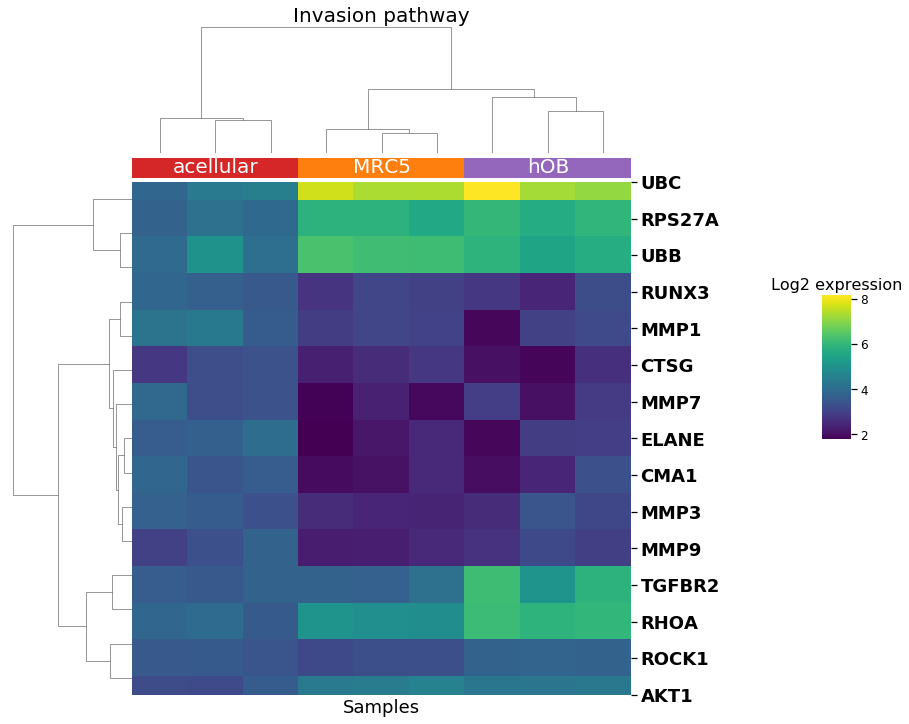

In [177]:
# compute the linkage matrix:

L = sch.linkage(d, method='complete')

sns.set_context('notebook')

column_colors = df_sig_genes.columns.map(lut)


# Use the computed linkage matrices in seaborn clustermap:
g = sns.clustermap(df_sig_genes, cmap='viridis', row_linkage=L, col_colors=column_colors, cbar_pos = (1.15, 0.4, 0.04, 0.2)) 

# add colorbar title
g.cax.set_title('Log2 expression', fontsize=16, y = -0.2)

# increase colorbar font size
g.cax.tick_params(labelsize=12)

# change y axis title
g.ax_heatmap.set_ylabel('')#, fontsize=16)

g.ax_heatmap.set_xlabel('Samples', fontsize=18)

# remove x tick labels
g.ax_heatmap.set_xticklabels([])
# remove x ticks
g.ax_heatmap.set_xticks([])

# annotate the column colors with the sample names
# !! NB this may need to be edited for each pathway to keep the colour scheme consistent
g.ax_col_colors.text(4.5, 0.5, 'MRC5', fontsize=20, ha='center', va='center', color='white')
g.ax_col_colors.text(1.5, 0.5, 'acellular', fontsize=20, ha='center', va='center', color='white')
g.ax_col_colors.text(7.5, 0.5, 'hOB', fontsize=20, ha='center', va='center', color='white')

# make y tick labels bigger and bold
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=18, fontweight='bold', rotation=0)

# add a title
g.ax_heatmap.set_title(f'{pathway_name} pathway', fontsize=20, pad = 160)

# save the figure:
g.savefig(f'../pathway_figures/{pathway_name}_clustermap.pdf', dpi=300)